In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
from sklearn.model_selection import train_test_split
from sklearn import datasets
from typing import List
from numpy.linalg import norm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
data = pd.read_csv(r"C:\Users\rauta\cs584\assignment4\iris_test.txt",sep = " ",header = None,)
data = pd.DataFrame(data)

In [3]:
data.head(5)

,0,1,2,3
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4


<AxesSubplot:>

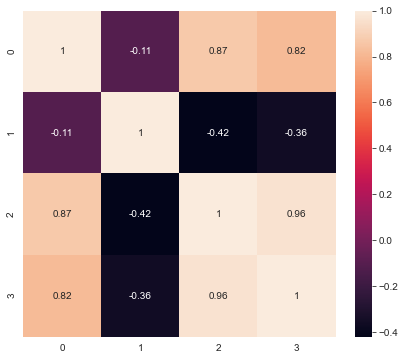

In [35]:
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(), annot=True)

In [4]:
X_nor = preprocessing.normalize(data)

In [5]:
X_std = StandardScaler().fit_transform(X_nor)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
X_pca.shape

(150, 2)

In [44]:
from sklearn.manifold import TSNE
tsne_iris = TSNE(n_components=2)
iris_scaled_tsne = tsne_iris.fit_transform(X_std)
iris_scaled_tsne.shape

(150, 2)

In [7]:
class Kmeans_Clustering:
    
    def __init__(self, clusters, iterations, random=123):
        self.clusters = clusters
        self.iterations = iterations
        self.random = random
    
    def centroids_random(self, X):
        np.random.RandomState(self.random)
        random_index = np.random.permutation(X.shape[0])
        centroids = X[random_index[:self.clusters]]
        return centroids
    
    def distance_datapoint(self, X, centroids):
        distance = np.zeros((X.shape[0], self.clusters))
        for i in range(self.clusters):
            dist = norm(X - centroids[i, :], axis=1)
            distance[:, i] = np.square(dist)
        return distance

    def closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def mean_centroids(self, X, labels):
        centroids = np.zeros((self.clusters, X.shape[1]))
        for i in range(self.clusters):
            centroids[i, :] = np.mean(X[labels == i, :], axis=0)
        return centroids

    def sum_of_squared_errors(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for i in range(self.clusters):
            distance[labels == i] = norm(X[labels == i] - centroids[i], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.centroids_random(X)
        
        for i in range(self.iterations):
            center = self.centroids
            distance = self.distance_datapoint(X, center)
            self.labels = self.closest_cluster(distance)
            self.centroids = self.mean_centroids(X, self.labels)
            if np.all(center == self.centroids):
                break
        self.error = self.sum_of_squared_errors(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.distance_datapoint(X, self.centroids)
        return self.closest_cluster(distance)



In [8]:
km_iris = Kmeans_Clustering(clusters=3, iterations=3000)
km_iris.fit(X_pca)
pred = km_iris.predict(X_pca)
centroids = km_iris.centroids

In [49]:
km_iris = Kmeans_Clustering(clusters=3, iterations=100)
km_iris.fit(iris_scaled_tsne)
pred = km_iris.predict(iris_scaled_tsne)
centroids = km_iris.centroids

In [9]:
print(centroids)

[[ 2.58894923 -0.13934158]
 [-1.81575284 -0.24849669]
 [-0.65735678  0.45854216]]


In [50]:
pred[pred==0]=7
pred[pred==1]=8
pred[pred==2]=9

pred[pred==7]=1
pred[pred==8]=2
pred[pred==9]=3

In [11]:
print(pred)

[1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2
 2 2 3 1 1 2 2 2 2 2 2 3 3 1 1 1 1 1 2 2 2 2 3 3 3 1 1 1 1 1 2 2 2 2 3 2 2
 2 2 2 3 2 2 3 2 2 3 3 3 3 1 1 1 1 1 1 2 2 3 3 3 3 3 3 3 1 2 2 2 2 2 2 2 2
 3 3 3 3 3 3 2 2 2 2 2 3 3 2 3 2 2 3 3 3 2 2 2 3 2 3 3 3 3 3 3 3 3 3 1 2 3
 3 3]


In [51]:
outfile = open('./HW4_iris_3_100_nst.txt','w')
outfile.writelines("%s\n"%pred[i] for i in range(len(pred)))
outfile.close()

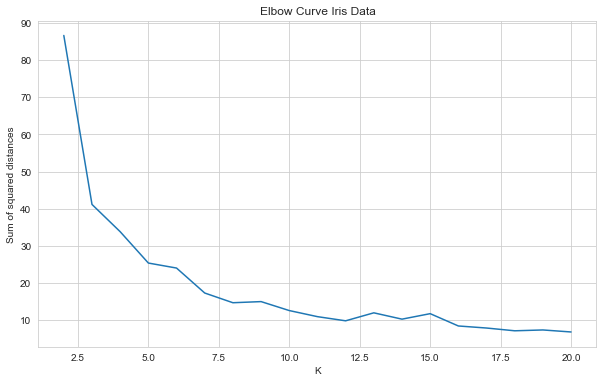

In [14]:
inr_iris = []

for k in range(2, 21, 1):
    km_iris = Kmeans_Clustering(clusters=k, iterations=3000)
    km_iris.fit(X_pca)
    inr_iris.append(km_iris.error)

plt.subplots(figsize=(10, 6))
sns.set_style('whitegrid')
sns.lineplot(x=range(2, 21, 1), y=inr_iris)
plt.title("Elbow Curve Iris Data")
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.show()

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,max_iter=3000)
#kmeans.fit(X_pca) iris_scaled_tsne
kmeans.fit(iris_scaled_tsne)

KMeans(max_iter=3000, n_clusters=3)

In [77]:
#kmeans_pred = kmeans.predict(X_pca)
label = kmeans.fit_predict(iris_scaled_tsne)

In [78]:
u_labels = np.unique(label)

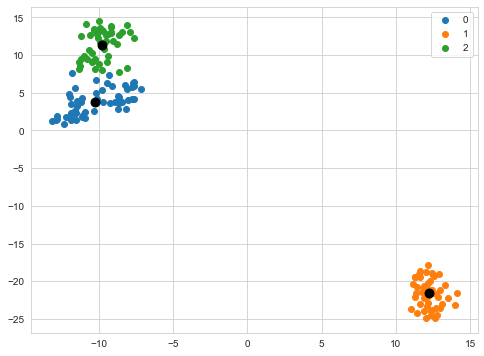

In [81]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(8,6)) 
for i in u_labels:
    plt.scatter(iris_scaled_tsne[label == i , 0] , iris_scaled_tsne[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [40]:
kmeans_pred

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1])

In [ ]:
kmeans.error

In [ ]:
# kmeans_pred[kmeans_pred==0]=7
# kmeans_pred[kmeans_pred==1]=8
# kmeans_pred[kmeans_pred==2]=9

# kmeans_pred[kmeans_pred==7]=1
# kmeans_pred[kmeans_pred==8]=2
# kmeans_pred[kmeans_pred==9]=3

In [41]:
outfile = open('./HW4_iris_sklearn_tsne.txt','w')
outfile.writelines("%s\n"%kmeans_pred[i] for i in range(len(kmeans_pred)))
outfile.close()

# image dataset

In [20]:
digit_data = pd.read_csv(r"C:\Users\rauta\cs584\assignment4\digit_test.txt",header = None,)
digit_data = pd.DataFrame(digit_data)

In [53]:
digit_data.shape

(10000, 784)

In [21]:
nor_digit = preprocessing.normalize(digit_data)

In [22]:
digit_scaled = StandardScaler().fit_transform(nor_digit)

In [ ]:
# pca = PCA(n_components=200)
# dig_scaled_pca = pca.fit_transform(digit_scaled)
# dig_scaled_pca.shape

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
dig_scaled_tsne = tsne.fit_transform(digit_scaled)
dig_scaled_tsne.shape

(10000, 2)

In [43]:
dig_scaled_tsne

array([[-27.571306, -29.956799],
       [ 46.60763 , -43.327938],
       [-49.61545 , -33.033333],
       ...,
       [-63.332996, -37.768257],
       [-33.34858 , -26.642897],
       [ 15.447909,  -7.751101]], dtype=float32)

In [24]:
dig_km = Kmeans_Clustering(clusters=10, iterations=100)
dig_km.fit(dig_scaled_tsne)
dig_pred = dig_km.predict(dig_scaled_tsne)
centroids = dig_km.centroids

In [ ]:
# dig_km = Kmeans_Clustering(clusters=10, iterations=100)
# dig_km.fit(dig_scaled_pca)
# dig_pred = dig_km.predict(dig_scaled_pca)
# centroids = dig_km.centroids

In [ ]:
outfile = open('./HW4_dig_3_10_50_nst.txt','w')
outfile.writelines("%s\n"%dig_pred[i] for i in range(len(dig_pred)))
outfile.close()

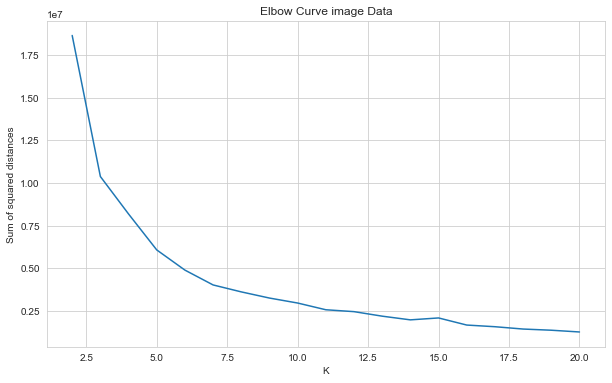

In [25]:
inr = []

for k in range(2, 21, 1):
    dig_km = Kmeans_Clustering(clusters=k, iterations=300)
    dig_km.fit(dig_scaled_tsne)
    inr.append(dig_km.error)

plt.subplots(figsize=(10, 6))
sns.set_style('whitegrid')
sns.lineplot(x=range(2, 21, 1), y=inr)
plt.title("Elbow Curve image Data")
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.show()

In [54]:
from sklearn.cluster import KMeans
dig_kmeans = KMeans(n_clusters=10,max_iter=100)
#kmeans.fit(X_pca) iris_scaled_tsne
dig_kmeans.fit(dig_scaled_tsne)

KMeans(max_iter=100, n_clusters=10)

In [69]:
#dig_kmeans_pred = dig_kmeans.predict(dig_scaled_tsne)
label = dig_kmeans.fit_predict(dig_scaled_tsne)

In [56]:
outfile = open('./HW4_dig_sklearn_tsne.txt','w')
outfile.writelines("%s\n"%dig_kmeans_pred[i] for i in range(len(dig_kmeans_pred)))
outfile.close()

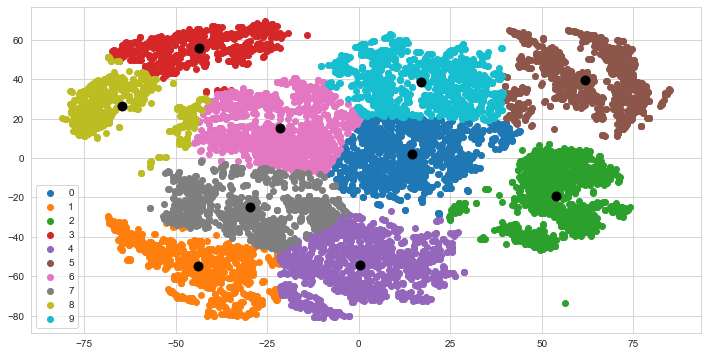

In [74]:
#Getting the Centroids
centroids = dig_kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(12,6)) 
for i in u_labels:
    plt.scatter(dig_scaled_tsne[label == i , 0] , dig_scaled_tsne[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()